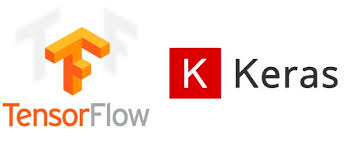

<div style="direction:rtl">

# رگرسیون خطی:
در رگرسیون خطی هدف برازش خطی بر روی مجموعه ای از داده ها می باشد که نزدیکترین فاصله را به تمامی داده ها داشته باشد آنگاه از این خط برای پیش بینی استفاده می کنیم. هر خط دارای یک عرض از مبدا و یک شیب می باشد که این دو پارامتر قابل یادگیری می باشند و ما می توانیم با استفاده از آن ها پیش بینی هایی انجام بدهیم. برای این منظور باید معادل خط را حل کنیم 
$$ y = Ax + b$$
</div>
<div style="direction:rtl">
شکل زیر نمایش گرافیکی از نحوه ی برازش خط بر روی مجموعه ای از داده ها می باشد 
</div>





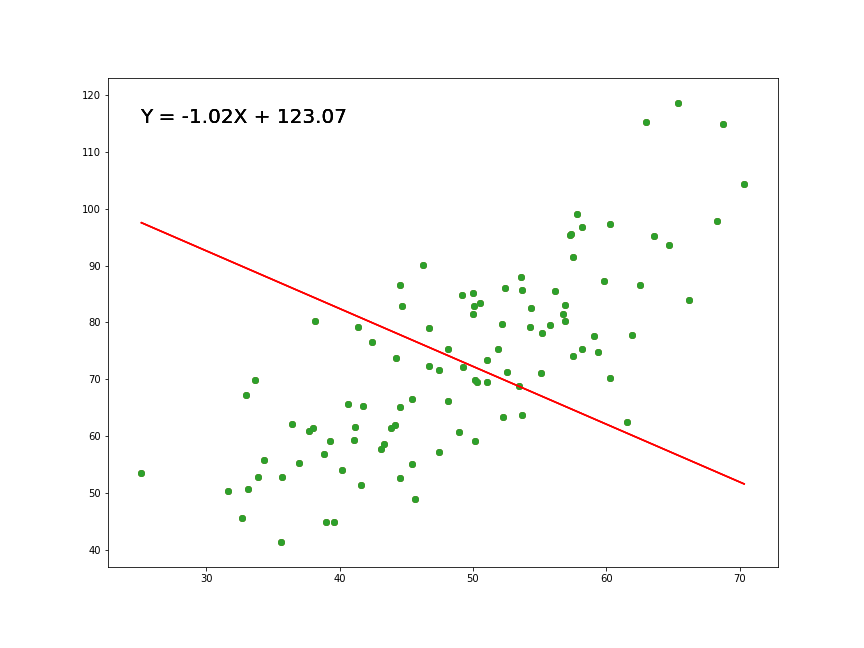

In [25]:
from IPython.display import Image
Image('/home/raminm/Desktop/Tutorial/tensorflow_cookbook-master/images/lin.gif')  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.python.framework import ops
ops.reset_default_graph()

<div style="direction:rtl">
در ابتدا دو متغییر برای عرض از مبدا و شیب خط را تعریف می کنیم. این دو متغییر قرار است طی فرایند یادگیری تغییر کنند و مقدار بهینه را پیدا کنند 
</div>


In [2]:
W = tf.Variable(tf.zeros([1, 1]), name="weights")
b = tf.Variable(0., name="bias")

<div style="direction:rtl">
تعریف تابع رگرسیون: برای محاسبه رگرسیون تابعی را تعریف می کنیم. این تابع قرار است مقدار زیر را حساب کند.

</div>
$$ y = Ax + b$$


In [3]:
# initialize variables/model parameters
# define the training loop operations
def regression(X):
    return tf.matmul(X, W) + b


<div style="direction:rtl">
    
### Loss Function
</div>
<div style="direction:rtl">
برای تابع هزینه نیز می توان از هر یک از توابع بررسی شده استفاده کرد

</div>

`tf.squared_difference()`

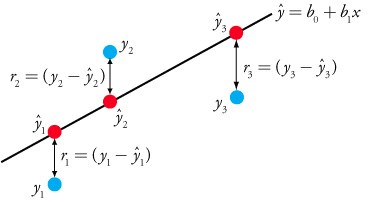



In [4]:
# compute inference model over data X and return the result
def loss(X, Y):
    Y_predicted = regression(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))


<div style="direction:rtl">
داده های ورودی را برای رگرسیون تعریف می کنیم. این داده ها به صورت دستی تعریف می شوند و قابل تعمیم به داده های واقعی می باشند.
</div>

In [9]:
def inputs():
    weight_age = [[84], [73], [65], [70], [76], [69], [63], [72]]
    blood_fat_content = [354, 190, 405, 263, 451, 302, 288, 385]
    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

<div style="direction:rtl">
مقدار نرخ یادگیری را در تابع بهینه ساز  تنظیم می کنیم
</div>

`0.0000001`


In [10]:
def train(total_loss):
    learning_rate = 0.0000001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

<div style="direction:rtl">
پس از این که مدل را تعریف کردیم باید بتوانیم آن را ارزیابی کنیم. برای ارزیابی آن مقدار داده هایی را باید به آن بفرستیم و نتیجه خروجی را بررسی کنیم.
</div>


In [11]:
def evaluate(sess, X, Y):    
    print (sess.run(regression([[ 25.]]))) # ~ 303
    print (sess.run(regression([[ 25.]]))) # ~ 256

<div style="direction:rtl">
یکی از روش هایی که می توان جلسه را روی گراف محاسباتی ایجاد کرد interactive session می باشد که در آن زمانی که از حلقه خارج می شویم. دیگر مقادیر آن غیر قابل اعتبار می باشند. همچنین اگر بخواهیم از برنامه نویسی نخ  در پایتون استفاده کنیم می توانیم از Coordinator() استفاده کنیم. در بخش زیر به هر دوی این مباحث می پردازیم  
</div>

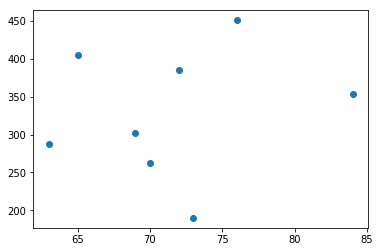

loss:  [6482168.5]
loss:  [455014.0]
[[114.51384]]
[[114.51384]]


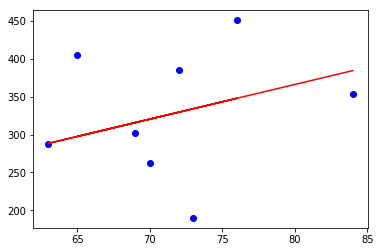

In [14]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    X, Y = inputs()
    plt.scatter(sess.run(X), sess.run(Y))
    plt.show()
    total_loss = loss(X, Y)
    train_op = train(total_loss)
    #coord = tf.train.Coordinator()
    #threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    # actual training loop
    training_steps = 1000
    for step in range(training_steps):
        sess.run([train_op])
        if step % 500 == 0:
            print ("loss: ", sess.run([total_loss]))
    evaluate(sess, X, Y)
    #coord.request_stop()
    #coord.join(threads)
   
    y=sess.run(regression(X))
    plt.plot(sess.run(X), sess.run(Y),'bo')
    plt.plot(sess.run(X), y,'r-')




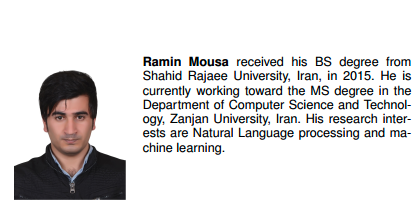